## 箱形图和小提琴图

In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
from netCDF4 import Dataset
# 新增

import seaborn as sns

## 基本参数

- 箱形图: [boxplot](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html?highlight=boxplot#matplotlib.axes.Axes.boxplot), [Demo](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py)

- 小提琴图: [violinplot](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.violinplot.html?highlight=violinplot#matplotlib.axes.Axes.violinplot)

共有 95 个数据


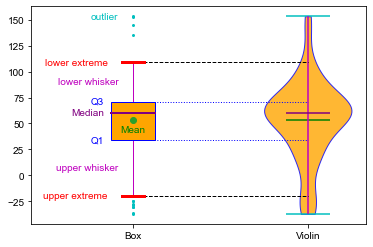

In [2]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 60
flier_high = np.random.rand(10) * 100 + 60
flier_low = np.random.rand(10) * -40
data = np.concatenate((spread, center, flier_high, flier_low))
print('共有',len(data),'个数据')
fig = plt.figure()
ax=plt.gca()
whis=1.5

# 箱形图
flierprops = dict(markerfacecolor='c',markeredgecolor='None', marker='.')
box=ax.boxplot(data,notch=False,showfliers=True,
           vert=True,patch_artist=True,showmeans=True,flierprops=flierprops,
           boxprops=dict(facecolor='orange',edgecolor='b'),
           medianprops={'color':'purple','lw':2},
           meanprops={'color':'g','marker':'o'},
           whiskerprops={'color':'m'},capprops={'color':'r','lw':3},whis=whis)
# 小提琴图
x_violin=1.6
violin=ax.violinplot(data,[x_violin],showmeans=True,showextrema=True, showmedians=True,widths=0.3)
for bd in violin['bodies']:
    bd.set_facecolor(box['boxes'][0].get_facecolor())
    bd.set_alpha(0.8)
    bd.set_edgecolor(box['boxes'][0].get_edgecolor())
# 自定义属性
violin['cmeans'].set_color(box['means'][0].get_color())
violin['cmedians'].set_color(box['medians'][0].get_color())
violin['cbars'].set_color(box['whiskers'][0].get_color())
violin['cmins'].set_color(box['fliers'][0].get_markerfacecolor())
violin['cmaxes'].set_color(box['fliers'][0].get_markerfacecolor())

# ===============================供参考学习==============================================
# 标注箱形图
Q1,Median,Q3 = np.percentile(data, [25, 50, 75])
for Q, label in zip([Q1,Q3],['Q1','Q3']):
    ax.text(0.9,Q,label,va='center',ha='right',color=box['boxes'][0].get_edgecolor())
    ax.hlines(Q,xmin=1,xmax=x_violin,ls='dotted',lw=1,color=box['boxes'][0].get_edgecolor())
ax.text(0.9,Median,'Median',va='center',ha='right',color=box['medians'][0].get_color())
ax.text(1,data.mean()-5,'Mean',va='top',ha='center',color=box['means'][0].get_color())
for whisker,label in zip(box['whiskers'],['upper whisker','lower whisker']):
    ax.text(whisker.get_xdata()[0]-0.05,whisker.get_ydata().mean(),label,va='center',ha='right',color=whisker.get_color())
for cap,label in zip(box['caps'],['upper extreme','lower extreme']):
    ax.text(cap.get_xdata()[0]-0.05,cap.get_ydata()[1],label,va='center',ha='right',color=cap.get_color())
    ax.hlines(cap.get_ydata()[1],xmin=cap.get_xdata()[0],xmax=x_violin,ls='dashed',lw=1)
ax.text(box['fliers'][0].get_xdata()[0]-0.05, box['fliers'][0].get_ydata()[-1], 'outlier',ha='right',va='center',color=box['fliers'][0].get_markerfacecolor())
ax.set_xlim(0.65,1.8)
ax.xaxis.set_ticks([1,x_violin])
ax.xaxis.set_ticklabels(['Box','Violin'])
# =============================================================================
fname_fig='../../figures/Chapter3/Lecture3_7_basic1.pdf'
plt.savefig(fname_fig)
os.system('pdfcrop '+fname_fig+' '+fname_fig)

plt.show()

## 实例

数据来源：[seaborn gallery](https://python-graph-gallery.com/58-show-number-of-observation-on-violinplot/)

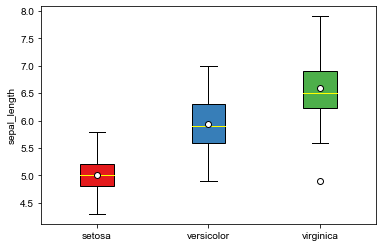

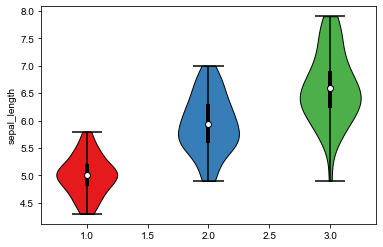

In [95]:
# 读取数据
alldata=pd.read_csv('Data/box_violin/data.csv')
x=alldata['species'].values
valuename='sepal_length'
y=alldata[valuename].values
groups=np.unique(x)
value_groups=[]
for group in groups:
    ind=(x==group)
    value_groups.append(y[ind])
# plot
#箱形图
fig=plt.figure()
ax=plt.gca()
boxes=ax.boxplot(value_groups,patch_artist=True,labels=groups,
               showmeans=True,meanprops={'marker':'o','mfc':'w','mec':'k'},
               medianprops={'color':'yellow'})
# 自定义
for box,color in zip(boxes['boxes'],plt.get_cmap('Set1').colors):
    box.set_facecolor(color)
ax.set_ylabel(valuename)
fname_fig='../../figures/Chapter3/Lecture3_7_box.pdf'
plt.savefig(fname_fig)
os.system('pdfcrop '+fname_fig+' '+fname_fig)
plt.show()

# 小提琴图
fig=plt.figure()
ax=plt.gca()
violins=ax.violinplot(value_groups,bw_method='silverman')
violins['cbars'].set_color('k')
violins['cmins'].set_color('k')
violins['cmaxes'].set_color('k')
for violin,pos,box,mean in zip(violins['bodies'],range(0,len(groups)),boxes['boxes'],boxes['means']):
    violin.set_facecolor(box.get_facecolor())
    violin.set_alpha(1)
    violin.set_edgecolor('k')
    upper_fourth=box.get_path().vertices[:-1,1].max()
    lower_fourth=box.get_path().vertices[:-1,1].min()
    ax.vlines(pos+1,ymin=lower_fourth,ymax=upper_fourth,color='k',lw=4)
    ax.plot(pos+1,mean.get_ydata(),'o',mfc='w',mec='k')
ax.set_ylabel(valuename)

fname_fig='../../figures/Chapter3/Lecture3_7_violin.pdf'
plt.savefig(fname_fig)
os.system('pdfcrop '+fname_fig+' '+fname_fig)
plt.show()


### Seborn绘制效果

Seborn的小提琴图功能还是很强大的

0

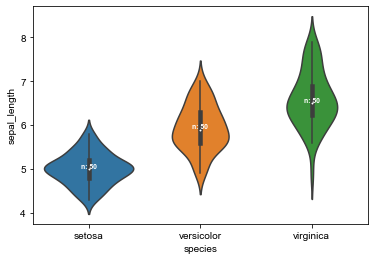

In [96]:
# library & dataset
import seaborn as sns, numpy as np
df = sns.load_dataset("iris")
# Basic violinplot
ax = sns.violinplot(x="species", y="sepal_length", data=df)
# Calculate number of obs per group & median to position labels
medians = df.groupby(['species'])['sepal_length'].median().values
nobs = df['species'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')
#sns.plt.show()
fname_fig='../../figures/Chapter3/Lecture3_7_violin_seaborn.pdf'
plt.savefig(fname_fig)
os.system('pdfcrop '+fname_fig+' '+fname_fig)